# Convolutional Neural Network
This Convolutional Neural Network (CNN) model is inspired by the classic LeNet-5 architecture. It is designed for image classification tasks and consists of convolutional, subsampling (pooling), and fully connected layers.
## Model Architecture

1. **C1 Convolutional Layer**
   - Filters: 6
   - Kernel Size: (5, 5)
   - Strides: (1, 1)
   - Activation: Tanh
   - Input Shape: (28, 28, 1) (grayscale images of size 28x28)

2. **S2 Subsampling (Pooling) Layer**
   - Pool Size: (2, 2)
   - Strides: (2, 2)
   - Type: Average Pooling

3. **C3 Convolutional Layer**
   - Filters: 6
   - Kernel Size: (5, 5)
   - Strides: (1, 1)
   - Activation: Tanh

4. **S4 Subsampling (Pooling) Layer**
   - Pool Size: (2, 2)
   - Strides: (2, 2)
   - Type: Average Pooling

5. **Flatten Layer**
   - Converts the 2D matrix into a 1D vector to connect with the fully connected layers.

6. **C5 Fully Connected Layer**
   - Units: 120
   - Activation: Tanh

7. **FC6 Fully Connected Layer**
   - Units: 84
   - Activation: Tanh

8. **Output Layer**
   - Units: 37 (corresponding to the number of classes)
   - Activation: Softmax

LeNet-5 is one of the pioneering architectures in the field of convolutional neural networks (CNNs), developed by Yann LeCun, Léon Bottou, Yoshua Bengio, and Patrick Haffner in 1998. It was designed primarily for handwritten digit recognition, specifically for the MNIST dataset. The architecture laid the groundwork for many modern CNNs and introduced several key concepts that are widely used today.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from keras.datasets import mnist

# Data Preparation

In [2]:
from load_emnist_mnist import load_emnist_mnist
from load_emnist_mnist import load_emnist_letters

X_train_mnist, X_test_mnist, y_train_mnist, y_test_mnist = load_emnist_mnist("emnist_mnist")
X_train_letters, X_test_letters, y_train_letters, y_test_letters = load_emnist_letters("emnist_letters")
y_train_letters = y_train_letters + 10
y_test_letters = y_test_letters + 10

In [3]:
X_train = np.concatenate((X_train_mnist, X_train_letters), axis=0)
y_train = np.concatenate((y_train_mnist, y_train_letters), axis=0)
X_test = np.concatenate((X_test_mnist, X_test_letters), axis=0)
y_test = np.concatenate((y_test_mnist, y_test_letters), axis=0)

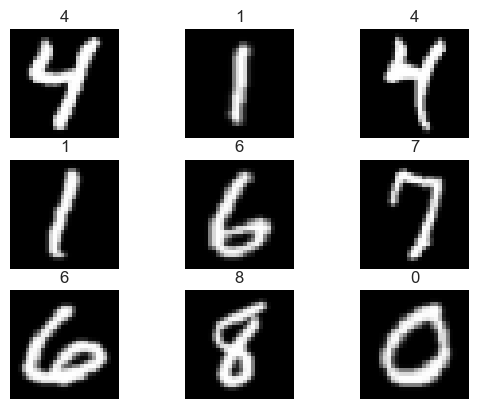

ValueError: num must be an integer with 1 <= num <= 12, not 0

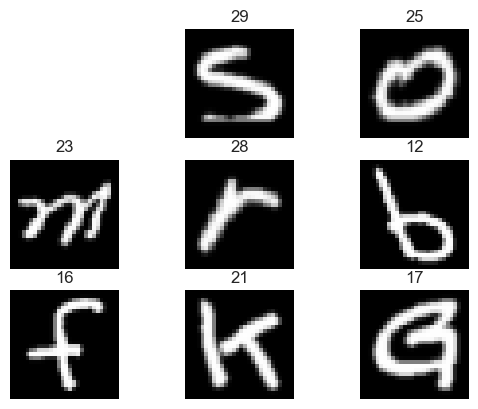

In [4]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.title(y_train[i])
plt.show()

for i in range(len(X_train) - 1, len(X_train) - 11, -1):
    plt.subplot(330 + 1 + len(X_train) - i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.title(y_train[i])
plt.show()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [5]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Model Building

In [6]:
from keras_tuner import RandomSearch
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, AveragePooling2D
from keras.src.optimizers import SGD

In [7]:
model = Sequential()

# C1 Convolution Layer
model.add(Conv2D(filters=6, strides=(1,1), kernel_size=(5,5), activation='tanh', input_shape=(28,28,1)))

# S2 SubSampling Layer
model.add(AveragePooling2D(pool_size=(2,2), strides=(2,2)))

# C3 Convolution Layer
model.add(Conv2D(filters=6, strides=(1,1), kernel_size=(5,5), activation='tanh'))

# S4 SubSampling Layer
model.add(AveragePooling2D(pool_size=(2,2), strides=(2,2)))

# C5 Fully Connected Layer
model.add(Dense(units=120, activation='tanh'))

# Flatten the output so that we can connect it with the fully connected layers by converting it into a 1D Array
model.add(Flatten())

# FC6 Fully Connected Layers
model.add(Dense(units=84, activation='tanh'))

# Output Layer
model.add(Dense(units=37, activation='softmax'))

# Compile the Model
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.1, momentum=0.0, decay=0.0), metrics=['accuracy'])


/Users/wojtek/Documents/uj/sem6/psi/project/psi-handwriting-recognition/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/wojtek/Documents/uj/sem6/psi/project/psi-handwriting-recognition/.venv/lib/python3.10/site-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 12, 12, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 6)        │           906 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 4, 4, 6)        │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4, 4, 120)      │           840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1920)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │       161,364 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 37)             │         3,145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 166,411 (650.04 KB)

 Trainable params: 166,411 (650.04 KB)

 Non-trainable params: 0 (0.00 B)

# Model Training

In [9]:
history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/30
1444/1444 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.6152 - loss: 1.4245 - val_accuracy: 0.8093 - val_loss: 0.5931
Epoch 2/30
1444/1444 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 0.8169 - loss: 0.5612 - val_accuracy: 0.8315 - val_loss: 0.5090
Epoch 3/30
1444/1444 ━━━━━━━━━━━━━━━━━━━━ 34s 24ms/step - accuracy: 0.8404 - loss: 0.4769 - val_accuracy: 0.8457 - val_loss: 0.4527
Epoch 4/30
1444/1444 ━━━━━━━━━━━━━━━━━━━━ 62s 43ms/step - accuracy: 0.8511 - loss: 0.4394 - val_accuracy: 0.8480 - val_loss: 0.4479
Epoch 5/30
1444/1444 ━━━━━━━━━━━━━━━━━━━━ 38s 26ms/step - accuracy: 0.8573 - loss: 0.4175 - val_accuracy: 0.8559 - val_loss: 0.4231
Epoch 6/30
1444/1444 ━━━━━━━━━━━━━━━━━━━━ 31s 22ms/step - accuracy: 0.8631 - loss: 0.3966 - val_accuracy: 0.8544 - val_loss: 0.4220
Epoch 7/30
1444/1444 ━━━━━━━━━━━━━━━━━━━━ 31s 21ms/step - accuracy: 0.8635 - loss: 0.3912 - val_accuracy: 0.8594 - val_loss: 0.4081
Epoch 8/30
1444/1444 ━━━━━━━━━━━━━━━━━━━━ 30s 21ms/step - accuracy: 0.8663 -

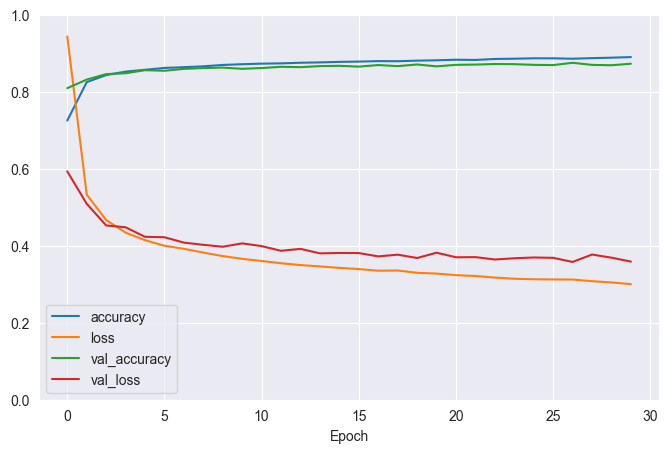

In [10]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.xlabel('Epoch')
plt.ylim([0, 1])
plt.show()

In [11]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

963/963 - 4s - 5ms/step - accuracy: 0.8727 - loss: 0.3588


In [12]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

963/963 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


In [13]:
def print_characters(X, y_pred, y_test, n_rows=4, n_cols=10):
    plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(X[index].reshape(28,28), cmap="binary", interpolation="nearest")
            plt.axis('off')
            if y_pred[index] >= 10:
                plt.title(chr(y_pred[index] - 11 + 97), color='black' if y_pred[index] == y_test[index] else 'red')
            else:
                plt.title(y_pred[index], color='black' if y_pred[index] == y_test[index] else 'red')
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    plt.show()

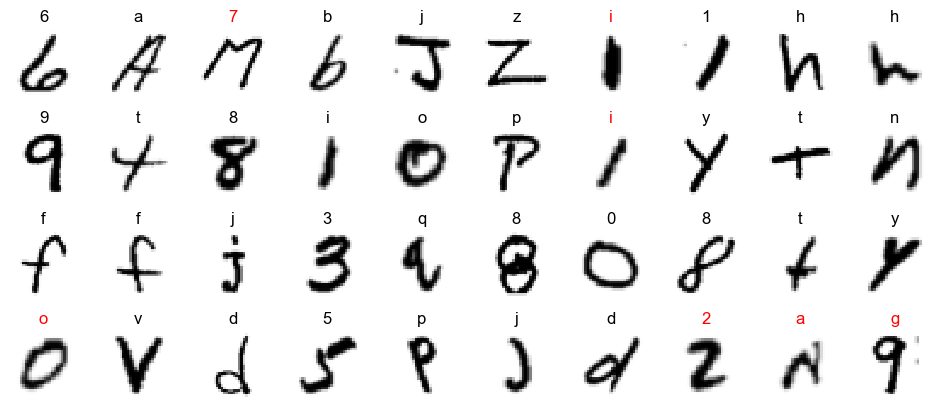

In [16]:
indexes = np.random.randint(0, X_test.shape[0], 4*10)
print_characters(X_test[indexes], y_pred[indexes], y_test[indexes])

from sklearn.metrics import accuracy_score

In [17]:
accuracy_score(y_test, y_pred)

0.8727272727272727

# Accuracy 0.872

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.83      0.72      1000
           1       0.55      0.80      0.65      1000
           2       0.86      0.93      0.89      1000
           3       0.98      0.95      0.96      1000
           4       0.95      0.89      0.92      1000
           5       0.90      0.89      0.90      1000
           6       0.92      0.95      0.94      1000
           7       0.98      0.98      0.98      1000
           8       0.89      0.95      0.92      1000
           9       0.78      0.91      0.84      1000
          11       0.87      0.92      0.89       800
          12       0.91      0.89      0.90       800
          13       0.95      0.95      0.95       800
          14       0.93      0.91      0.92       800
          15       0.95      0.93      0.94       800
          16       0.96      0.93      0.95       800
          17       0.79      0.69      0.73       800
          18       0.91    

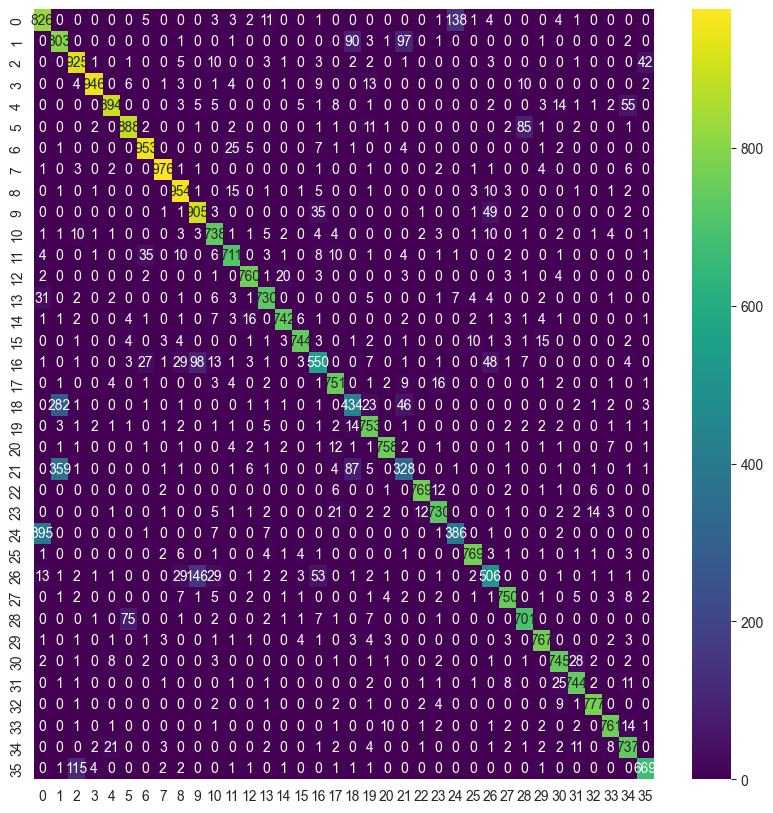

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.show()


In [20]:
# save model
model.save('cnn_mnist_letters_lenet5.keras')